In [2]:
import pickle
import matplotlib.pyplot as plt
import itertools
%matplotlib inline

## Introduction

- This notebook contains steps to analyse the harmonic phonon properties of the hybrid halide perovskite MAPI with a negatively charged iodine interstitial defect
- `IPR_dictionary.p` contains various properties (including inverse participation ratio) of each gamma-point harmonic phonon mode in a 222 supercell (96-atom) of MAPI with a negative iodine interstitial.
- The defect structure is included in this folder as `POSCAR.vasp`

### Associated literature

Further details (including structural relaxation and phonon calculation details) can be found in:
   - L. D. Whalley et al., 2020. *[Giant Huang-Rhys factor for electron capture at the iodine interstitial in MAPI]()*
   - L.D. Whalley, 2019. PhD thesis, *[Defects and Distortions in Hybrid Halide Perovskites](https://doi.org/10.25560/79304)* (Chapter 6)

### Inverse Participation Ratio

To identify which phonon modes are associated with the iodine interstitial defect we use the Inverse Participation Ratio (IPR) to quantify localisation.

The IPR is calculated from the harmonic phonon eigenvectors $e_i$ of the system and is given by
\begin{equation}
\mathrm{IPR} = \frac{\left(\sum_{i=1}^N|e_i|\right)^2}{\sum_{i=1}^N\left(|e_i|\right)^2},
\end{equation}
where N is the number of phonon modes. This provides a measure of how many atoms the phonon is distributed over. For example, for a chain of four atoms, a delocalised acoustic mode will have an $\textrm{IPR}=4$. At the other extreme, a phonon mode whose polarisation displaces only one atom will have an $\textrm{IPR}=1$.

The Inverse Participation Ratio (IPR) can be calculated using the [juliaphonons package](https://github.com/jarvist/Julia-Phonons). The harmonic phonon eigenfunctions and frequencies can be calculated using [phonopy](https://phonopy.github.io/phonopy/) to pre- and post-process forces calculated using e.g. Density Function Theory, Molecular Dynamics.

## IPR Analysis

### 1. Identifying localised modes

Text(0.5, 0, 'IPR')

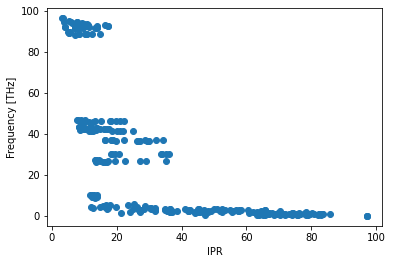

In [8]:
# load phonon properties
phonon_properties = pickle.load(open("./IPR_dictionary.p","rb"))
# 96-atom supercell with an additional iodine interstitial defect
num_atoms = 97
num_modes = num_atoms*3

# list IPR and frequency data across all modes
frequency = []
IPR = []
for mode in phonon_properties:
    frequency.append(phonon_properties[mode]['freq'])
    IPR.append(phonon_properties[mode]['IPR-distance'])

# plot
plt.scatter(IPR,frequency)
plt.ylabel("Frequency [THz]")
plt.xlabel("IPR")

There are a number of localised phonon modes. We can filter for the most highly localised ones (where `IPR-distance`<25):

In [9]:
print ("frequency      ", "IPR")
for i in range(1,num_modes):
    if phonon_properties[i]['IPR-distance']<30:
        print(i, phonon_properties[i]['freq'],"  ",phonon_properties[i]['IPR-distance'])

frequency       IPR
64 1.5902196857    21.41996312648896
66 1.7106084414    27.165916580929498
75 1.9577188429    24.202479899188223
98 2.5894861988    27.24204714196699
107 2.8104776416    26.808901952244216
115 3.0731670659    26.907321272965362
116 3.0938448175    27.425604524058002
118 3.1639162138    28.3384461386182
123 3.2945608541    25.092154000501907
130 3.5447143248    16.95394337870676
132 3.7160298999    17.249111754946203
136 4.0432149522    12.706062538524137
137 4.1521589486    19.78005502967529
138 4.1806764656    16.479297460305922
139 4.2517677171    26.258980314932497
140 4.5317593008    12.120569763478057
141 4.5896585047    14.881379579229652
142 4.6693388818    15.945765456646003
143 4.8380261881    28.738270164373198
144 5.1314935199    16.694857137799897
145 5.294753777    23.54567740099822
146 5.5680202666    17.972819406014093
147 5.7117212604    25.240017909792947
148 8.9563628429    13.261751641577805
149 9.0671163232    13.863770923373805
150 9.1476498446 

The localised mode with the lowest frequency (and energy) is at 1.59THz. 

### 2. Properties of the localised mode at 1.59THz

This frequency is equal to that of the harmonic potential energy surface (PES) calculated for the negatively charged iodine interstitial (see the literature listed above for more details). This makes sense; the harmonic PES is valide for small displacements around equilibrium, which is the space we are sampling in the harmonic phonon calculation. The agreement between the harmonic phonon calculation and the harmonic PES justifies the use of a single configuration coordinate Q for the PES; Q is a good approximation to the accepting modes of the charge transition.  

An animation of the phonon mode at 1.59THz, generated using the [ascii-phonons](https://github.com/ajjackson/ascii-phonons) package, is available at https://bit.ly/MAPI_phonon.

To verify that this mode is localised around the iodine interstitial (atom index 95) and the lattice iodine it forms a dimer with (atom index 96), an additional filter can be used to locate those where atom numbers 95 and 96 make a contribution to the phonon energy (where `efrac`>0.05).

In [22]:
print ("frequency      ", "IPR                ","efrac")
for i,j in itertools.product(range(1,num_modes),range(1,num_atoms)):
    if phonon_properties[i][j]['efrac']>0.03 and (j==95 or j==96) and phonon_properties[i]['IPR-distance']<30:
        print (i, phonon_properties[i]['freq'],"  ",phonon_properties[i]['IPR-distance'], " ",phonon_properties[i][j]['efrac']) 

frequency       IPR                 efrac
64 1.5902196857    21.41996312648896   0.053566709865937284
64 1.5902196857    21.41996312648896   0.05346389356289189
66 1.7106084414    27.165916580929498   0.05162546812315868
66 1.7106084414    27.165916580929498   0.04907367819990428
142 4.6693388818    15.945765456646003   0.03926431983521863
142 4.6693388818    15.945765456646003   0.03958798369850175
143 4.8380261881    28.738270164373198   0.03185182743905141
143 4.8380261881    28.738270164373198   0.03145140046181075
146 5.5680202666    17.972819406014093   0.03967906561694908
146 5.5680202666    17.972819406014093   0.039322696011781226
147 5.7117212604    25.240017909792947   0.03223705296578235
147 5.7117212604    25.240017909792947   0.03247747273429075


Ok, so it seems that 11% (5.4%+5.3%) of 1.59THz mode energy can be attributed to the displacement of the two bonding iodines; a significant amount of energy (89%) is distributed amongst the other atoms. This might be expected as the MAPI lattice is soft, and we can see from the equilibrium geometry of the two charge states that there is a large distortion of the surrounding lattice after charge capture.
%
The 1.59THz mode is at index 64. We can find which atoms contribute the most energy (more than 3% of the total phonon energy) to this phonon mode and then, using [vesta](https://jp-minerals.org/vesta/en/), see if it is localised around the iodine dimer as we would expect.

In [34]:
efrac=0
for i in range(1, num_atoms):
    if phonon_properties[64][i]['efrac']>0.03:
        print(i,phonon_properties[64][i]['efrac'])
        efrac+=phonon_properties[64][i]['efrac']
print(efrac)

2 0.06440239147774258
4 0.06168246449883173
26 0.03264137712248505
28 0.031979777950358314
34 0.03338512132720793
36 0.031326106363531926
72 0.062681916758608
82 0.043887046008908755
84 0.04350373149048876
95 0.053566709865937284
96 0.05346389356289189
0.5125205364269922


The atoms that each contribute more than 3% of the total phonon energy are highlighted below. Taken together, they account for more than half of the phonon energy.

![](./localised_mode.png)

 The phonon mode is localised around the bonding iodine, two of the four nearest neighbour iodines and one out of two nearest neighbour lead. The atoms lie in the ab-plane.

### 3. Properties of other phonon modes associated with the bonding iodine

Lets find the other modes which have a large energy contribution from the bonding iodine.

In [29]:
print("atom 95")
print ("frequency      ", "IPR                ","efrac")
for i in range(1,num_modes):
    if phonon_properties[i][95]['efrac'] > 0.05:
        print(phonon_properties[i]['freq'],"  ",phonon_properties[i]['IPR-distance'], " ",phonon_properties[i][95]['efrac'])
print("--")
print("atom 96")
print ("frequency      ", "IPR                ","efrac")
for i in range(1,num_modes):
    if phonon_properties[i][96]['efrac'] > 0.05:
        print(phonon_properties[i]['freq'],"  ",phonon_properties[i]['IPR-distance'], " ",phonon_properties[i][96]['efrac'])


atom 95
frequency       IPR                 efrac
1.2445419727    76.16413158454093   0.05407767127403516
1.5902196857    21.41996312648896   0.053566709865937284
1.7106084414    27.165916580929498   0.05162546812315868
2.1002269022    78.33814252970394   0.053834439129200565
--
atom 96
frequency       IPR                 efrac
1.2445419727    76.16413158454093   0.05403453247239753
1.5902196857    21.41996312648896   0.05346389356289189
1.7917596692    36.579393404057626   0.05109936059885246
2.1002269022    78.33814252970394   0.05399791237458211
2.6634703325    54.94381334407585   0.05006890382195754


An 11%% contribution from the bonding iodine is an upper limit for this system. There isn't another localised mode with a contribution of more than 10% from the bonding iodine.